In [1]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition
import mglearn
from sklearn.preprocessing import OneHotEncoder


from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam

In [2]:
# FONT 깨질때 폰트깨질때
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname = "C:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

In [3]:
df = pd.read_excel('./최종 데이터 그래프그리기용.xlsx') 
print(df)

      Sample_ID GROUP  COHORT SEX  AGE     Trait FitbitOX      Fitbit_ID  HTN  \
0         S0001   SMI       2   M   60  fitbit_O        O  sevrance00001  NaN   
1         S0002   SMI       2   M   61  fitbit_O        O  sevrance00002  NaN   
2         S0003   SMI       2   F   52  fitbit_O        O  sevrance00003  NaN   
3         S0004   SMI       2   F   41  fitbit_O        O  sevrance00004  NaN   
4         S0005   SMI       2   F   41  fitbit_O        O  sevrance00005  NaN   
..          ...   ...     ...  ..  ...       ...      ...            ...  ...   
383  MetS_S0280  MetS       1   F   24  fitbit_O        O   gnfmmets+139  NaN   
384  MetS_S0281  MetS       1   F   44  fitbit_O        O   gnfmmets+140  NaN   
385  MetS_S0282  MetS       1   F   37  fitbit_O        O   gnfmmets+141  1.0   
386  MetS_S0283  MetS       1   M   51  fitbit_X        X              X  NaN   
387  MetS_S0284  MetS       1   F   42  fitbit_X        X              X  NaN   

      DM  ...  BDI_Q13_2 BD

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','TG_1','FatPercentage _1','BMI_1','PSQI_TOTAL_1','TG_2','FatPercentage_2','BMI_2','PSQI_TOTAL_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1','TG_1',
           'HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2','TG_2']]

In [4]:
psqi_df=df[['Sample_ID','GROUP','COHORT','SEX','AGE','Insulin _1','FatPercentage _1','TG_1','BMI_1','AST_1','BUN_1','HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1',
              'Insulin _2','FatPercentage_2','TG_2','BMI_2','AST_2','BUN_2','HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]

In [5]:
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
#보조 호르몬 요법을 받고 있는 Cohort 3 제거 Filter 적용
psqi_df = psqi_df[(psqi_df['COHORT'] != 3)]
psqi_df

,Sample_ID,GROUP,COHORT,SEX,AGE,Insulin _1,FatPercentage _1,TG_1,BMI_1,AST_1,...,PSQI_Q5e_2,PSQI_Q5f_2,PSQI_Q5g_2,PSQI_Q5h_2,PSQI_Q5i_2,PSQI_Q5j_2,PSQI_Q6_2,PSQI_Q7_2,PSQI_Q8_2,PSQI_Q9_2
0,S0001,SMI,2,M,60,7.7,15.0,81,21.110190,21.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1,S0002,SMI,2,M,61,5.4,29.5,106,27.782064,29.0,...,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
2,S0003,SMI,2,F,52,5.1,39.1,231,24.944742,16.0,...,3.0,0.0,3.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0
3,S0004,SMI,2,F,41,4.2,29.1,94,22.620489,16.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,1.0
4,S0005,SMI,2,F,41,3.2,24.6,70,20.524157,26.0,...,0.0,0.0,0.0,1.0,1.0,1.0,3.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,MetS_S0280,MetS,1,F,24,11.3,34.4,51,34.803410,14.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384,MetS_S0281,MetS,1,F,44,10.6,43.8,104,30.903615,27.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
385,MetS_S0282,MetS,1,F,37,12.2,35.8,128,28.676533,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
386,MetS_S0283,MetS,1,M,51,10.4,26.8,163,24.549738,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
psqi_df=psqi_df.dropna()
psqi_df.reset_index(drop=True, inplace=True)
psqi_df.isnull().sum()
psqi_df=psqi_df.drop(["Sample_ID", "GROUP", "COHORT"],axis=1)
#1분, 매일다름, 정해진간이없음 삭제

In [8]:
#<150 (정상) : 0 -> 중간 값인 80으로 조정
#한단계씩 상향 조정
#150~199 (약간 높음 - 체중감량과 운동요법) : 1 -> 80~150 (정상)
#200~499 (높음 - 생활요법과 함께 약물치료 고려) : 2 -> 150~199 (약간 높음)
#>500 (아주 높음 - 즉시 약물치료) : 3 한명도 해당 X -> 200~ (높음~아주높음)

#psqi_df["TG_1"] = psqi_df["TG_1"].apply(lambda x: 0. if x<80 else 1. if 80<=x<150 else 2. if 150<=x<200 else 3.)
#psqi_df["TG_2"] = psqi_df["TG_2"].apply(lambda x: 0. if x<80 else 1. if 80<=x<150 else 2. if 150<=x<200 else 3.)

In [9]:
psqi_df["SEX"] = psqi_df["SEX"].apply(lambda x: 1. if x=='M' else 0.)

In [10]:
psqi_df["Insulin _1"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)
psqi_df["Insulin _2"] = psqi_df["Insulin _1"].apply(lambda x: 0.1 if x=='<0.2' else 0. if x=='<0.1' else x)

#x 배열 생성 (x=psqi)
X1=psqi_df[['PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
                           'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
                           'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values
X2=psqi_df[['PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
                           'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
                           'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=임의)
X1=psqi_df[['SEX','AGE','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1',
            'PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1','PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1',
            'PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values
X2=psqi_df[['SEX','AGE','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2',
            'PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2','PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2',
            'PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=선별)
X1=psqi_df[['AGE','HDL_1','DBP_1','Waist_1','SBP_1','BMI_1','Fat_1_x','PSQI_TOTAL_1']].values
X2=psqi_df[['AGE','HDL_2','DBP_2','Waist_2','SBP_2','BMI_2','Fat_2_x','PSQI_TOTAL_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

#x 배열 생성 (x=임의+선별)
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg)
Y1 = psqi_df['TG_1'].tolist()
Y2 = psqi_df['TG_2'].tolist()
Y=Y1+Y2

In [25]:
#x 배열 생성 (x=임의+선별)
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','TG_1','AST_1','BUN_1','LDL_1']].values

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','TG_2','AST_2','BUN_2','LDL_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=tg, sex, age)
Y1= psqi_df[['BMI_1']].values
Y2= psqi_df[['BMI_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

#x 배열 생성 (x=임의+선별)
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']].values

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']].values
X=np.concatenate((X1, X2), axis=0)

#y 배열 생성 (y=BMI)
Y1= psqi_df[['TG_1']].values
Y2= psqi_df[['TG_2']].values
Y=np.concatenate((Y1, Y2), axis=0)

#x df 생성 (x=임의+선별) ~수정작업중~
X1=psqi_df[['HDL_1','DBP_1','Waist_1','SBP_1','Fat_1_x','Insulin _1','FatPercentage _1','BMI_1','AST_1','BUN_1','LDL_1',
            'PSQI_TOTAL_1','PSQI_C1_1','PSQI_C2_1','PSQI_C3_1','PSQI_C4_1','PSQI_C5_1','PSQI_C6_1','PSQI_C7_1','PSQI_Q1_1','PSQI_Q2_1','PSQI_Q3_1','PSQI_Q4_1',
            'PSQI_Q5a_1','PSQI_Q5b_1','PSQI_Q5c_1','PSQI_Q5d_1','PSQI_Q5e_1','PSQI_Q5f_1','PSQI_Q5g_1','PSQI_Q5h_1','PSQI_Q5i_1','PSQI_Q5j_1','PSQI_Q6_1','PSQI_Q7_1','PSQI_Q8_1','PSQI_Q9_1']]
#예외처리
X1=X1.rename({ 'Fat_1_x' : 'Fat_x_1'}, axis=1)
X1=X1.rename({ 'FatPercentage _1' : 'FatPercentage_1'}, axis=1)
X1=X1.rename({ 'Insulin _1' : 'Insulin_1'}, axis=1)
for i in X1.columns:
    X1=X1.rename({ i : i[:-2]}, axis=1)

X2=psqi_df[['HDL_2','DBP_2','Waist_2','SBP_2','Fat_2_x','Insulin _2','FatPercentage_2','BMI_2','AST_2','BUN_2','LDL_2',
            'PSQI_TOTAL_2','PSQI_C1_2','PSQI_C2_2','PSQI_C3_2','PSQI_C4_2','PSQI_C5_2','PSQI_C6_2','PSQI_C7_2','PSQI_Q1_2','PSQI_Q2_2','PSQI_Q3_2','PSQI_Q4_2',
            'PSQI_Q5a_2','PSQI_Q5b_2','PSQI_Q5c_2','PSQI_Q5d_2','PSQI_Q5e_2','PSQI_Q5f_2','PSQI_Q5g_2','PSQI_Q5h_2','PSQI_Q5i_2','PSQI_Q5j_2','PSQI_Q6_2','PSQI_Q7_2','PSQI_Q8_2','PSQI_Q9_2']]
#예외처리
X2=X2.rename({ 'Fat_2_x' : 'Fat_x_2'}, axis=1)
X2=X2.rename({ 'Insulin _2' : 'Insulin_2'}, axis=1)
for i in X2.columns:
    X2=X2.rename({ i : i[:-2]}, axis=1)

X=pd.concat((X1, X2), axis=0)


#y df 생성 (y=tg, sex, age)
Y1= psqi_df[['TG_1', 'SEX', 'AGE']]
Y2= psqi_df[['TG_2', 'SEX', 'AGE']]

Y1=Y1.rename({'TG_1' : 'TG'}, axis=1)
Y2=Y2.rename({'TG_2' : 'TG'}, axis=1)
Y=pd.concat((Y1, Y2), axis=0)

In [26]:
len(X), len(Y)

(352, 352)

In [27]:
X.shape, Y.shape

((352, 11), (352, 1))

# 정규화

In [28]:
#정규화 (변수간의 스케일 차이)
X = StandardScaler().fit_transform(X)

#주성분 분석 실시
pca = decomposition.PCA(n_components=2) #주성분 갯수 2개 생성
sklearn_pca_x = pca.fit_transform(x_std)
sklearn_result = pd.DataFrame(sklearn_pca_x, columns=['PC1','PC2'])
sklearn_result

X=sklearn_result.values

In [29]:
np.random.seed(0)
X=np.asarray(X).astype(np.float)
Y=np.asarray(Y).astype(np.float)
x_train,x_test,y_train,y_test=train_test_split(X,Y,train_size=0.8)

In [30]:
X.shape, Y.shape

((352, 11), (352, 1))

x_train

x_test

y_train

y_test

# MLP

In [31]:
#define model
model=Sequential()
model.add(Dense(32, activation='relu', input_dim=11)) #전체 37, psqi빼면 전체 11
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

model.compile(loss='mse',optimizer='rmsprop',metrics=['mse'])

#fit model
history=model.fit(x_train, y_train, epochs=100, batch_size=4)
model.evaluate(x_test, y_test) 

Epoch 1/100
71/71 [==============================] - 1s 700us/step - loss: 498.2837 - mse: 498.2837
Epoch 2/100
71/71 [==============================] - 0s 814us/step - loss: 331.0599 - mse: 331.0599
Epoch 3/100
71/71 [==============================] - 0s 686us/step - loss: 123.4135 - mse: 123.4135
Epoch 4/100
71/71 [==============================] - 0s 686us/step - loss: 52.9464 - mse: 52.9464
Epoch 5/100
71/71 [==============================] - 0s 786us/step - loss: 37.5555 - mse: 37.5555
Epoch 6/100
71/71 [==============================] - 0s 757us/step - loss: 29.6928 - mse: 29.6928
Epoch 7/100
71/71 [==============================] - 0s 671us/step - loss: 27.4498 - mse: 27.4498
Epoch 8/100
71/71 [==============================] - 0s 900us/step - loss: 17.4740 - mse: 17.4740
Epoch 9/100
71/71 [==============================] - 0s 700us/step - loss: 13.8794 - mse: 13.8794
Epoch 10/100
71/71 [==============================] - 0s 714us/step - loss: 14.2824 - mse: 14.2824
Epoch 11/100


[11.895540237426758, 11.895540237426758]

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                384       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,473
Trainable params: 1,473
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

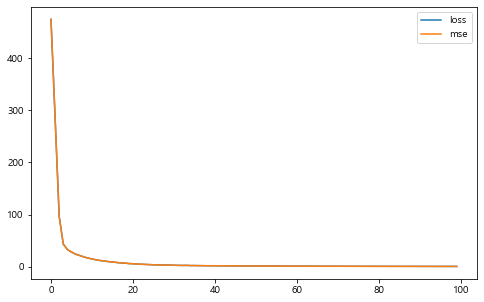

In [33]:
pd.DataFrame(history.history).plot(figsize=(8,5))

In [34]:
y_p = model.predict(x_test)
                    

for t,p in zip(y_test,y_p):
    print(t,p)

[18.64518936] [19.055897]
[22.81018514] [22.638233]
[20.17325264] [22.172924]
[19.24695535] [20.81652]
[20.04939325] [20.00268]
[20.61320372] [20.726326]
[22.24775767] [22.837414]
[28.1238875] [30.273918]
[25.00330295] [23.014898]
[28.81271503] [28.484764]
[22.61940001] [22.598791]
[19.80274009] [21.227362]
[21.90799086] [21.060913]
[23.73219079] [21.865162]
[27.20609937] [24.119293]
[32.90406427] [31.425564]
[24.46267294] [25.880623]
[18.81410733] [20.12138]
[22.29553296] [39.52818]
[22.75605244] [21.568123]
[20.48684047] [21.785805]
[19.84958747] [18.764053]
[24.05734352] [24.115541]
[18.984375] [19.632793]
[24.92986295] [22.693695]
[18.58525437] [19.629704]
[22.04727123] [22.956333]
[19.00241759] [21.386047]
[22.99663365] [23.185123]
[26.30322674] [27.402317]
[24.20764392] [23.723804]
[21.60937151] [21.778143]
[18.62519844] [18.187454]
[40.11628209] [42.49293]
[26.34410498] [24.900251]
[24.63374291] [27.002403]
[18.25550268] [19.13911]
[19.25070186] [20.011696]
[27.52362949] [25.099

In [35]:
y_test_list=np.array(y_test).flatten().tolist()
y_p_list=np.array(y_p).flatten().tolist()
y_train_list=np.array(y_train).flatten().tolist()

In [38]:
#오차 범위 5 설정

scores = 0
for i in range(len(y_test)):
    if  y_train_list[i]-5 <= y_p_list[i] <= y_train_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-5 <= y_p_list[i] <= y_test_list[i]+5:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 69.01 %
test set prediction accuracy: 95.77 %


In [37]:
#오차 범위 20 설정

scores = 0
for i in range(len(y_test)):
    if  y_train_list[i]-20 <= y_p_list[i] <= y_train_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("train set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

#======================================================================================

scores = 0
for i in range(len(y_test)):
    if  y_test_list[i]-20 <= y_p_list[i] <= y_test_list[i]+20:
        scores+=1

accuracy=scores/len(y_test)
print("test set prediction accuracy: {:.2f} %".format(accuracy*100)) # 예측 정확도

train set prediction accuracy: 100.00 %
test set prediction accuracy: 100.00 %


# 오차범위 별 허용 예측 정확도
### 1. 임의+선별
- <오차범위 +-10> <br>
train: 21.13% <br>
test: 32.39% <br>

- <오차범위 +-20> <br>
train: 33.80% <br>
test: 54.93% <br>

### 2. 임의+선별 (PSQI제외)
- <오차범위 +-10> <br>
train: 16.90% <br>
test: 12.68% <br>

- <오차범위 +-20> <br>
train: 33.80% <br>
test: 45.07% <br>